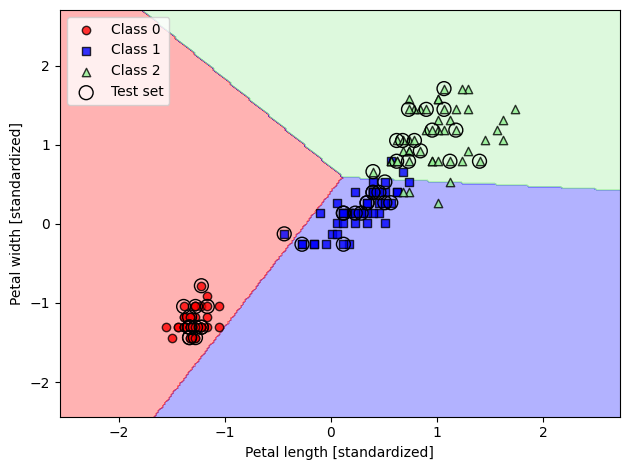

In [6]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()\
# 特徴量を取得
X = iris.data[:, [2, 3]]
# クラスラベルを取得
y = iris.target
from sklearn.model_selection import train_test_split
# 訓練データとテストデータに分割: 7:3
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# 訓練データの平均と標準偏差を計算
sc.fit(X_train)
# 平均と標準偏差を用いて標準化
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
from sklearn.linear_model import Perceptron
# 学習率0.1でパーセプトロンのインスタンスを生成
ppn = Perceptron(max_iter=100, eta0=0.1, random_state=1)
# モデルに適合
ppn.fit(X_train_std, y_train)
# テストデータで予測を実施
y_pred = ppn.predict(X_test_std)
# 二次元決定境界の可視化
from matplotlib.colors import ListedColormap # カラーマップを自作するため
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # マーカーとカラーマップの準備
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))]) # unique(y) はyの値の種類数を返す
    
    #決定領域のプロット
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    #グリッドポイントの生成
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution)) # 図を塗りつぶすために縦横それぞれ1メモリ0.02の大きさの区画を作る
    
    # 各点の分類を予測
    lab = classifier.predict(np.array([xx1.ravel() , xx2.ravel()]).T) # revel→行列を横一列の配列に、np.array→2×n行列に、T→転置
    
    # 予測結果を元のグリッドポイントのデータサイズに変換
    lab = lab.reshape(xx1.shape)
    # グリッドポイントの境界線をプロット
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap) #(x座標,y座標,高さ(0,1),透明度,カラーマップ) 等高線の気分で引いている
    # 軸の範囲の設定
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # クラスごとに訓練データをプロット
    for idx, cl in enumerate(np.unique(y)): # enumerate インデックス番号と要素
        plt.scatter(x=X[y==cl, 0],
                    y=X[y==cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')
    if test_idx:
        # すべてのデータ点をプロット
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='none', edgecolor='black', alpha=1.0, linewidth=1, marker='o', s=100, label='Test set')
        
# 訓練データとテストデータの特徴量を行方向に結合
X_combined_std = np.vstack((X_train_std, X_test_std))
# 訓練データとテストデータのクラスラベルを結合
y_combined = np.hstack((y_train, y_test))
# 決定領域をプロット
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105, 150))

# 設定
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
# 凡例の設定
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

## 収束しないとはいえ最大イテレーション数変えても目視じゃあまりかわらない

Misclassified examples: 10


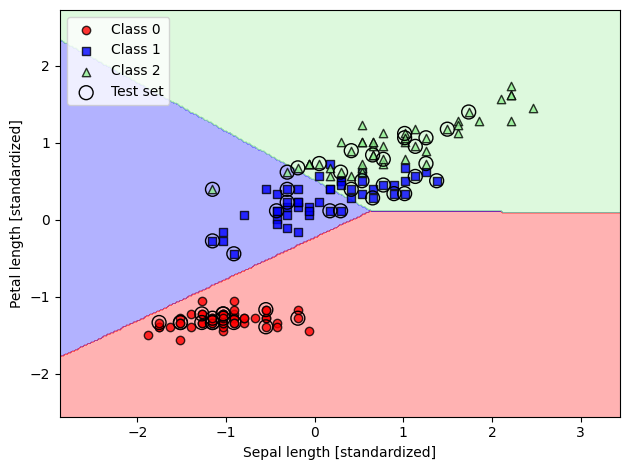

2章と同様、がくと花びらの長さを考える


In [8]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()\
# 特徴量を取得
X = iris.data[:, [0, 2]]
# クラスラベルを取得
y = iris.target
from sklearn.model_selection import train_test_split
# 訓練データとテストデータに分割: 7:3
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# 訓練データの平均と標準偏差を計算
sc.fit(X_train)
# 平均と標準偏差を用いて標準化
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
from sklearn.linear_model import Perceptron
# 学習率0.1でパーセプトロンのインスタンスを生成
ppn = Perceptron(max_iter=100, eta0=0.1, random_state=1)
# モデルに適合
ppn.fit(X_train_std, y_train)
# テストデータで予測を実施
y_pred = ppn.predict(X_test_std)

print("Misclassified examples: %d" % (y_pred != y_test).sum())
# 二次元決定境界の可視化
from matplotlib.colors import ListedColormap # カラーマップを自作するため
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # マーカーとカラーマップの準備
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))]) # unique(y) はyの値の種類数を返す
    
    #決定領域のプロット
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    #グリッドポイントの生成
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution)) # 図を塗りつぶすために縦横それぞれ1メモリ0.02の大きさの区画を作る
    
    # 各点の分類を予測
    lab = classifier.predict(np.array([xx1.ravel() , xx2.ravel()]).T) # revel→行列を横一列の配列に、np.array→2×n行列に、T→転置
    
    # 予測結果を元のグリッドポイントのデータサイズに変換
    lab = lab.reshape(xx1.shape)
    # グリッドポイントの境界線をプロット
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap) #(x座標,y座標,高さ(0,1),透明度,カラーマップ) 等高線の気分で引いている
    # 軸の範囲の設定
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # クラスごとに訓練データをプロット
    for idx, cl in enumerate(np.unique(y)): # enumerate インデックス番号と要素
        plt.scatter(x=X[y==cl, 0],
                    y=X[y==cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')
    if test_idx:
        # すべてのデータ点をプロット
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='none', edgecolor='black', alpha=1.0, linewidth=1, marker='o', s=100, label='Test set')
        
# 訓練データとテストデータの特徴量を行方向に結合
X_combined_std = np.vstack((X_train_std, X_test_std))
# 訓練データとテストデータのクラスラベルを結合
y_combined = np.hstack((y_train, y_test))
# 決定領域をプロット
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105, 150))

# 設定
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
# 凡例の設定
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()
print("2章と同様、がくと花びらの長さを考える")

## 誤分類多いね

## OvR をやってみる　(scikit-learnはデフォでOvRをラベル数分やってるらしい)

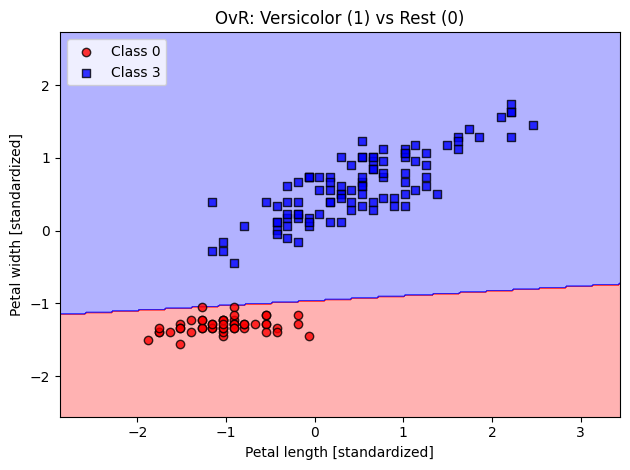

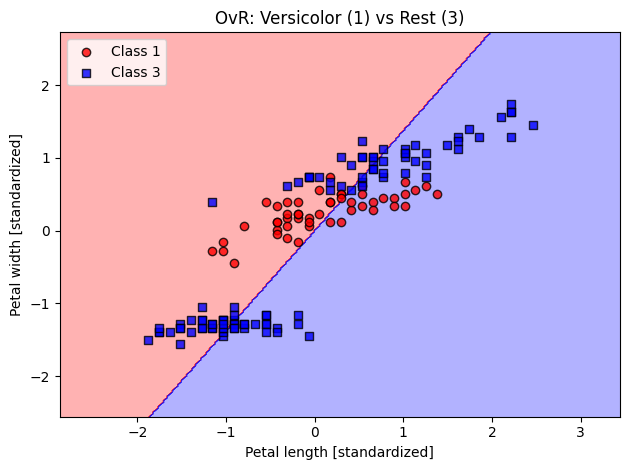

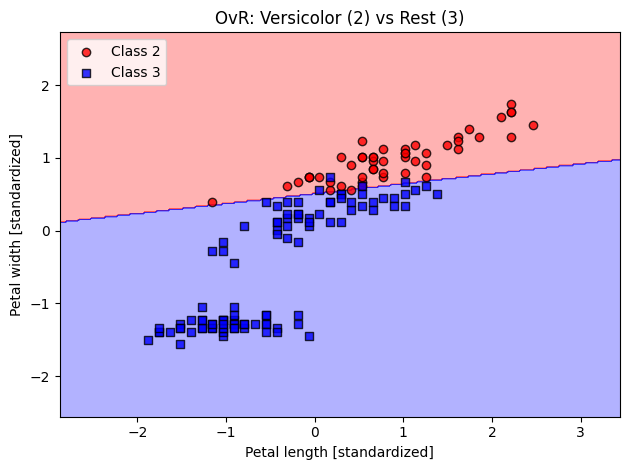

In [ ]:
# OvRを手動で再現する
y_ovr1 = np.where(y_combined == 0, 0, 3)

# パーセプトロンを学習
ppn_ovr = Perceptron(max_iter=100, eta0=0.1, random_state=1)
ppn_ovr.fit(X_combined_std, y_ovr1)

# 可視化
plot_decision_regions(X=X_combined_std, y=y_ovr1, classifier=ppn_ovr)

plt.title('OvR: Versicolor (1) vs Rest (3)')
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
# OvRを手動で再現する
y_ovr1 = np.where(y_combined == 1, 1, 3)

# パーセプトロンを学習
ppn_ovr = Perceptron(max_iter=100, eta0=0.1, random_state=1)
ppn_ovr.fit(X_combined_std, y_ovr1)

# 可視化
plot_decision_regions(X=X_combined_std, y=y_ovr1, classifier=ppn_ovr)

plt.title('OvR: Versicolor (1) vs Rest (3)')
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
# OvRを手動で再現する
y_ovr1 = np.where(y_combined == 2, 2, 3)

# パーセプトロンを学習
ppn_ovr = Perceptron(max_iter=100, eta0=0.1, random_state=1)
ppn_ovr.fit(X_combined_std, y_ovr1)

# 可視化
plot_decision_regions(X=X_combined_std, y=y_ovr1, classifier=ppn_ovr)

plt.title('OvR: Versicolor (2) vs Rest (3)')
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## ラベル1が他と全く線形分離出来てない結果が表われてる